In [1]:
# General Libraries and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the Dataset
bank_loans = pd.DataFrame(pd.read_csv("/content/Bank_Loan_Granting.csv"))

bank_loans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


### Features

ID: customer ID

Age: age of customer

Experience: the number of years that the customer has experience (presumably work experience)

Income: the customer's annual earnings

ZIP Code: the postal code of the customer's location

Family: the number of people in the customer's family

CCAvg: the average monthly credit card spending

Education: the level of customer's Education (undergraduate, graduate, professional)

Mortgage: the Value of the customer's mortgage (the thing that the customer uses as a guarantee to the bank)

Securities Account: whether the customer has a security account or not (it's also known as an investment account)

CD Account: whether the customer has a CD account or not (a type of savings account that lets the customer earn interest on a fixed amount of money for a fixed period)

Online: whether the customer uses the bank's online services or not

CreditCard: whether the customer uses the bank's credit card or not

### Target Feature

Personal Loan: whether the customer is granted bank loans or not

### Exploratory Data Analysis

In [3]:
bank_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [4]:
bank_loans.isna().sum()

# No missing values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Convert the object type (string) to a numerical one for the models to work

bank_loans['CCAvg'] = bank_loans['CCAvg'].str.replace("/" , '.').astype(np.float64)

In [6]:
bank_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
bank_loans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [8]:
bank_loans['Personal Loan']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [9]:
bank_loans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
bank_loan_stats = bank_loans.describe()

# Subset min, max, and mean
subset_bank_loan_stats = bank_loan_stats.loc[['count', 'min', 'max', 'mean', 'std']]

# Replace the mean of columns with categorical (or discrete) values as this statistic is not insightful
subset_bank_loan_stats.loc[['mean', 'std'], 'ID'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'ZIP Code'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'Family'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'Education'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'Personal Loan'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'Securities Account'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'CD Account'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'Online'] = 'NA'
subset_bank_loan_stats.loc[['mean', 'std'], 'CreditCard'] = 'NA'

subset_bank_loan_stats.T

,count,min,max,mean,std
ID,5000.0,1.0,5000.0,NA,NA
Age,5000.0,23.0,67.0,45.3384,11.463166
Experience,5000.0,-3.0,43.0,20.1046,11.467954
Income,5000.0,8.0,224.0,73.7742,46.033729
ZIP Code,5000.0,9307.0,96651.0,NA,NA
Family,5000.0,1.0,4.0,NA,NA
CCAvg,5000.0,0.0,10.0,1.937938,1.747659
Education,5000.0,1.0,3.0,NA,NA
Mortgage,5000.0,0.0,635.0,56.4988,101.713802
Personal Loan,5000.0,0.0,1.0,NA,NA


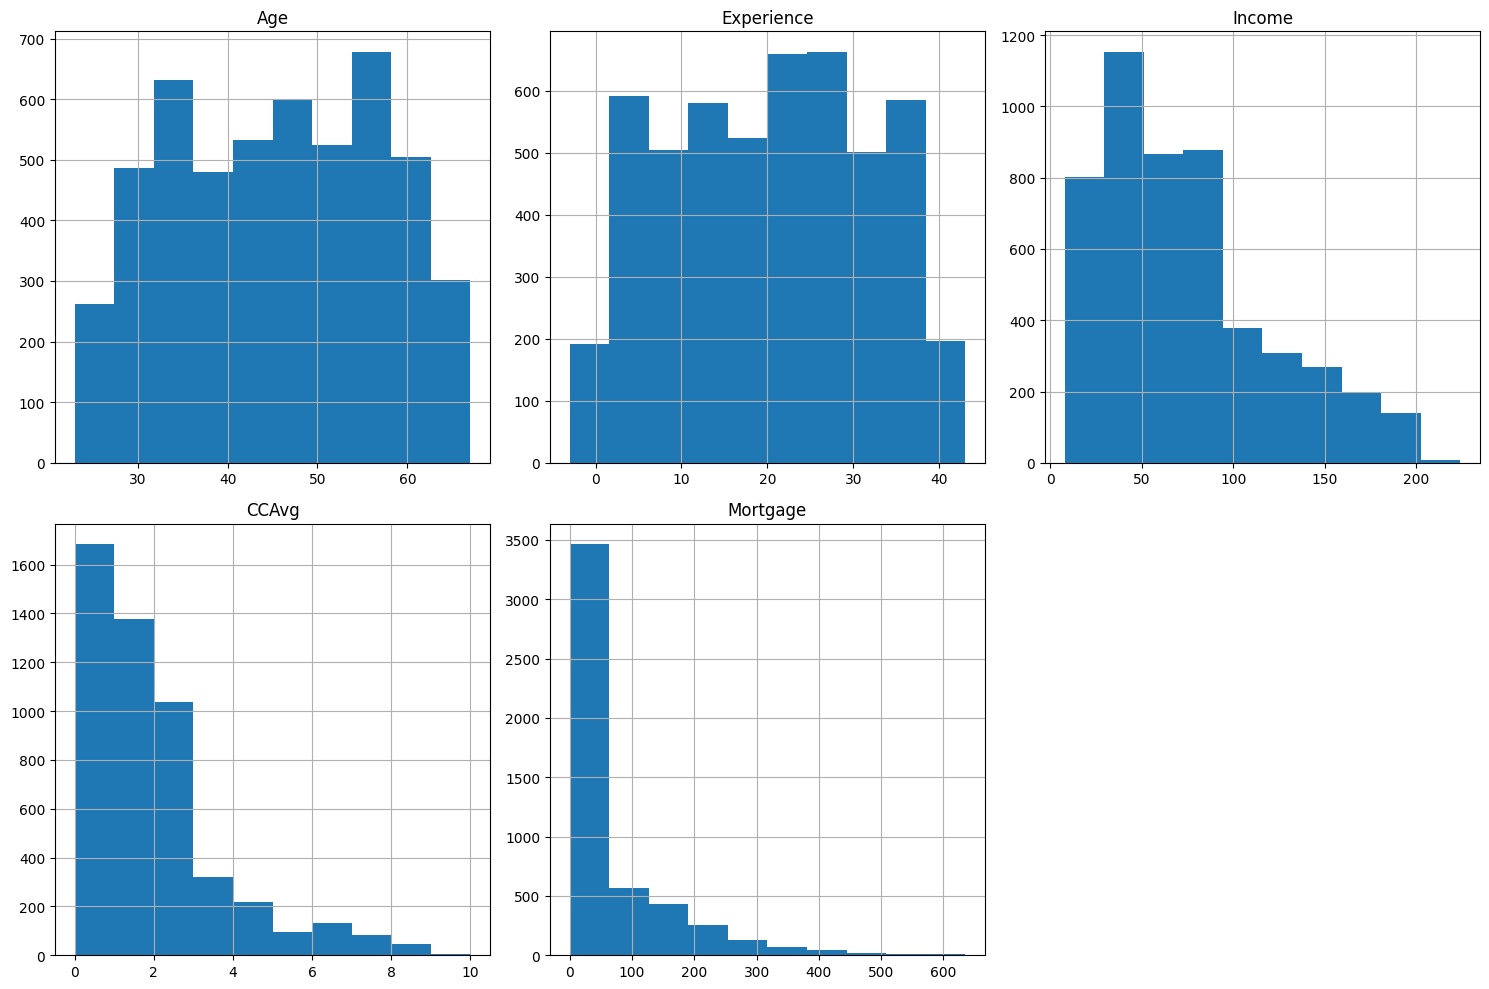

In [11]:
continuous_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

bank_continuous = bank_loans[continuous_columns]

# Create a figure and manually create subplots
fig = plt.figure(figsize = (15, 10))

# Create the first histogram (position 1)
plt.subplot(2, 3, 1)
bank_continuous['Age'].hist()
plt.title('Age')

# Create the second histogram (position 2)
plt.subplot(2, 3, 2)
bank_continuous['Experience'].hist()
plt.title('Experience')

# Create the third histogram (position 3)
plt.subplot(2, 3, 3)
bank_continuous['Income'].hist()
plt.title('Income')

# Create the fourth histogram (position 4)
plt.subplot(2, 3, 4)
bank_continuous['CCAvg'].hist()
plt.title('CCAvg')

# Create the fifth histogram (position 5)
plt.subplot(2, 3, 5)
bank_continuous['Mortgage'].hist()
plt.title('Mortgage')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

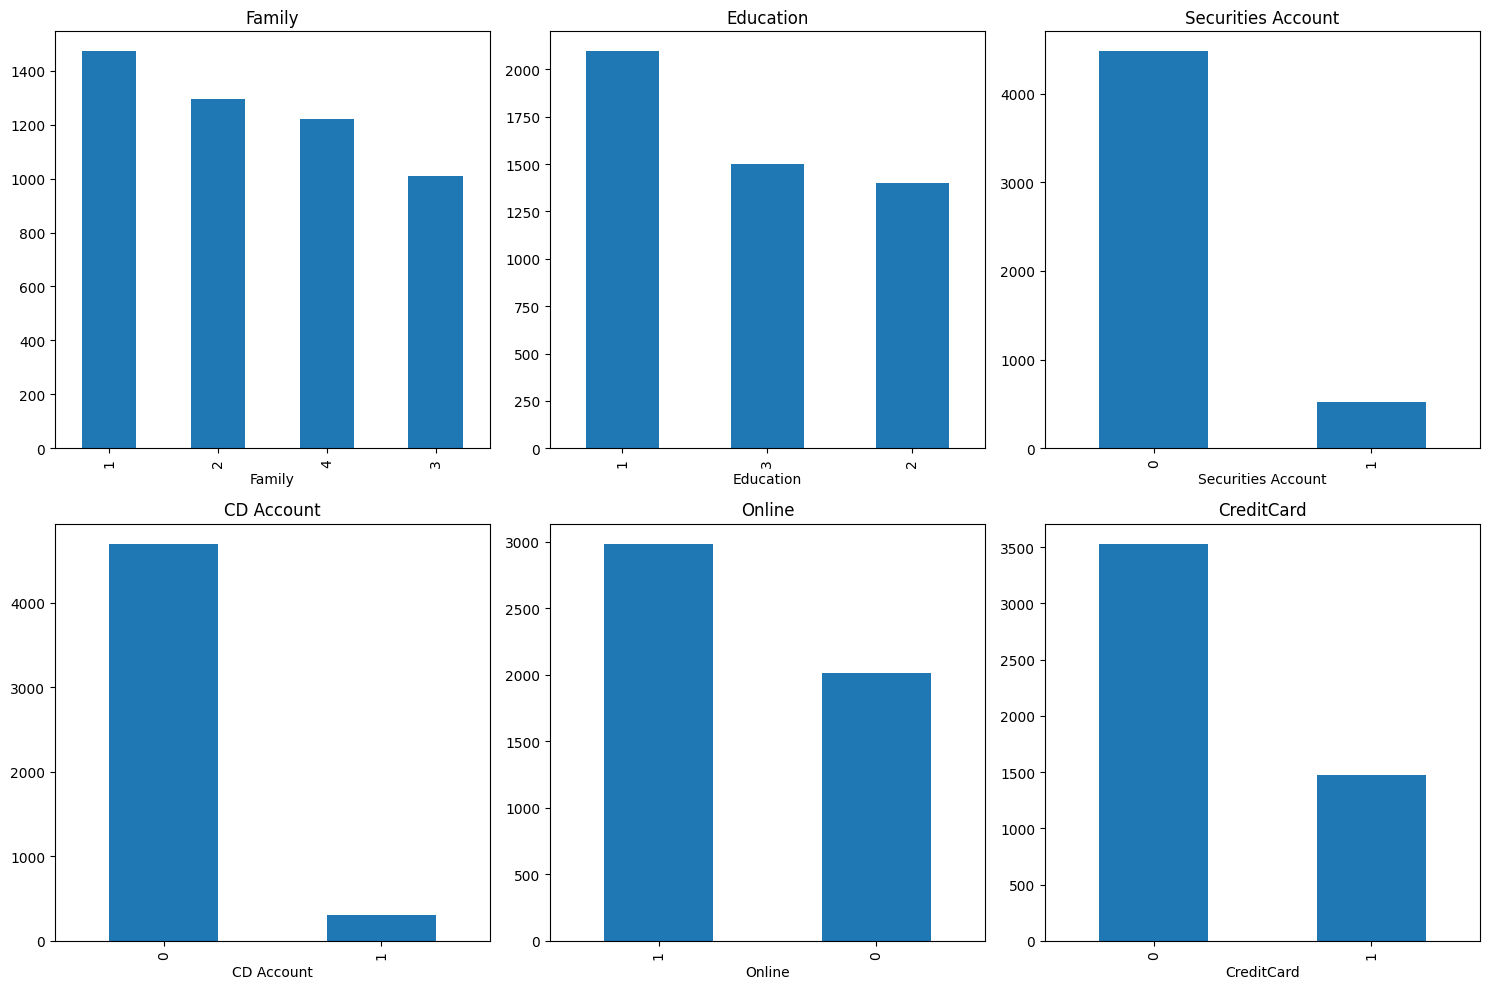

In [12]:
discrete_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

bank_discrete = bank_loans[discrete_columns]

# Create a figure and manually create subplots
fig = plt.figure(figsize = (15, 10))

# Create the first bar plot (position 1)
plt.subplot(2, 3, 1)
bank_discrete['Family'].value_counts().plot(kind = 'bar')
plt.title('Family')

# Create the second bar plot (position 2)
plt.subplot(2, 3, 2)
bank_discrete['Education'].value_counts().plot(kind = 'bar')
plt.title('Education')

# Create the third bar plot (position 3)
plt.subplot(2, 3, 3)
bank_discrete['Securities Account'].value_counts().plot(kind = 'bar')
plt.title('Securities Account')

# Create the fourth bar plot (position 4)
plt.subplot(2, 3, 4)
bank_discrete['CD Account'].value_counts().plot(kind = 'bar')
plt.title('CD Account')

# Create the fifth bar plot (position 5)
plt.subplot(2, 3, 5)
bank_discrete['Online'].value_counts().plot(kind = 'bar')
plt.title('Online')

# Create the sixth bar plot (position 6)
plt.subplot(2, 3, 6)
bank_discrete['CreditCard'].value_counts().plot(kind = 'bar')
plt.title('CreditCard')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

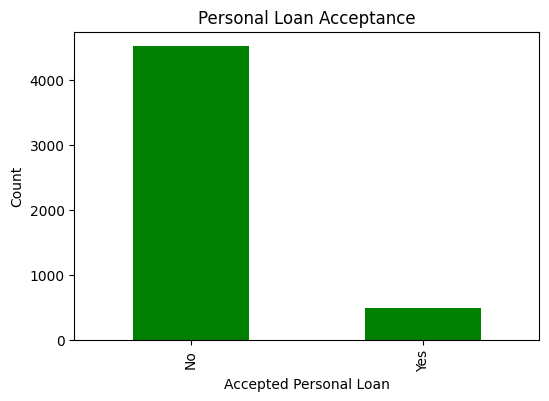

In [13]:
target_feature = ['Personal Loan']

bank_target = bank_loans[target_feature]

# Plot the count of each class
plt.figure(figsize=(6, 4))
bank_target['Personal Loan'].value_counts().plot(kind='bar', color = 'green')
plt.title('Personal Loan Acceptance')
plt.xlabel('Accepted Personal Loan')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


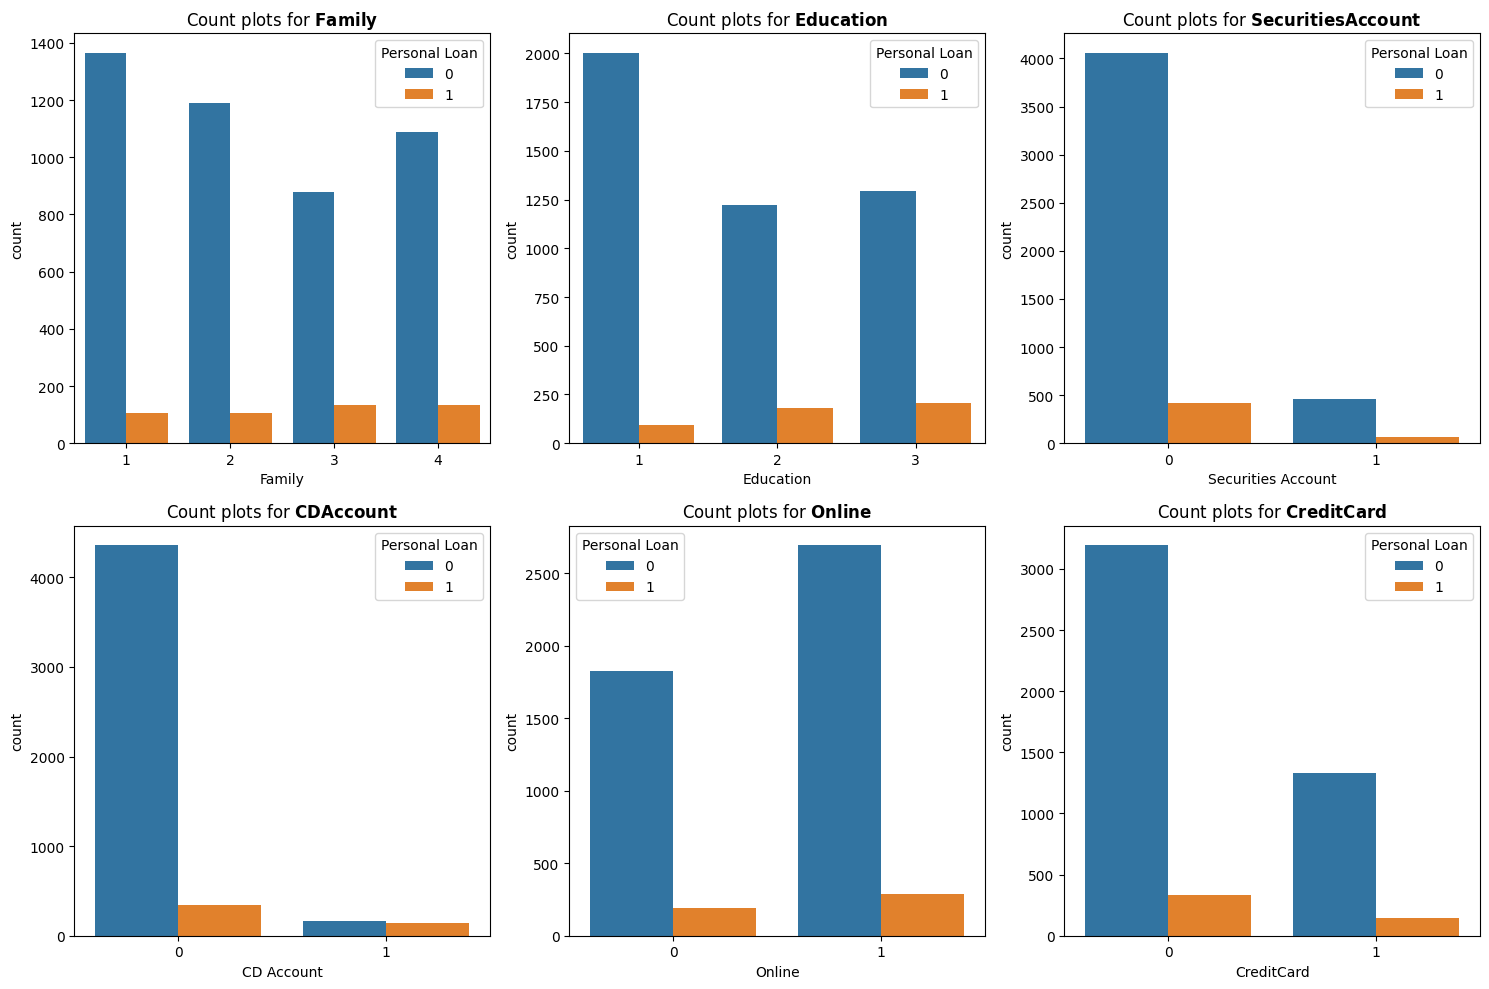

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(bank_discrete.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(data=bank_loans, x=col,hue='Personal Loan')
    plt.title(f"Count plots for $\\mathbf{{{col}}}$")
plt.tight_layout()
plt.show()

- Most customers are considered 1-person families. But, 3-person families and 4-person families are granted loans more than others.
- The highest educational attainment of most customers is undergraduate, but graduate and professional customers are granted loans more than others.
- Most customers who were granted loans didn't have a securities account. This insight highlights the importance of different features in increasing the chance of being granted loans.
- Similarly, most customers who were granted loans didn't have a CD Account. But, if you have a CD Account, it is highly likely that you will be granted a loan.
- Most customers who were granted loans used Online services.
- Most customers who were granted loans didn't use a Credit Card.

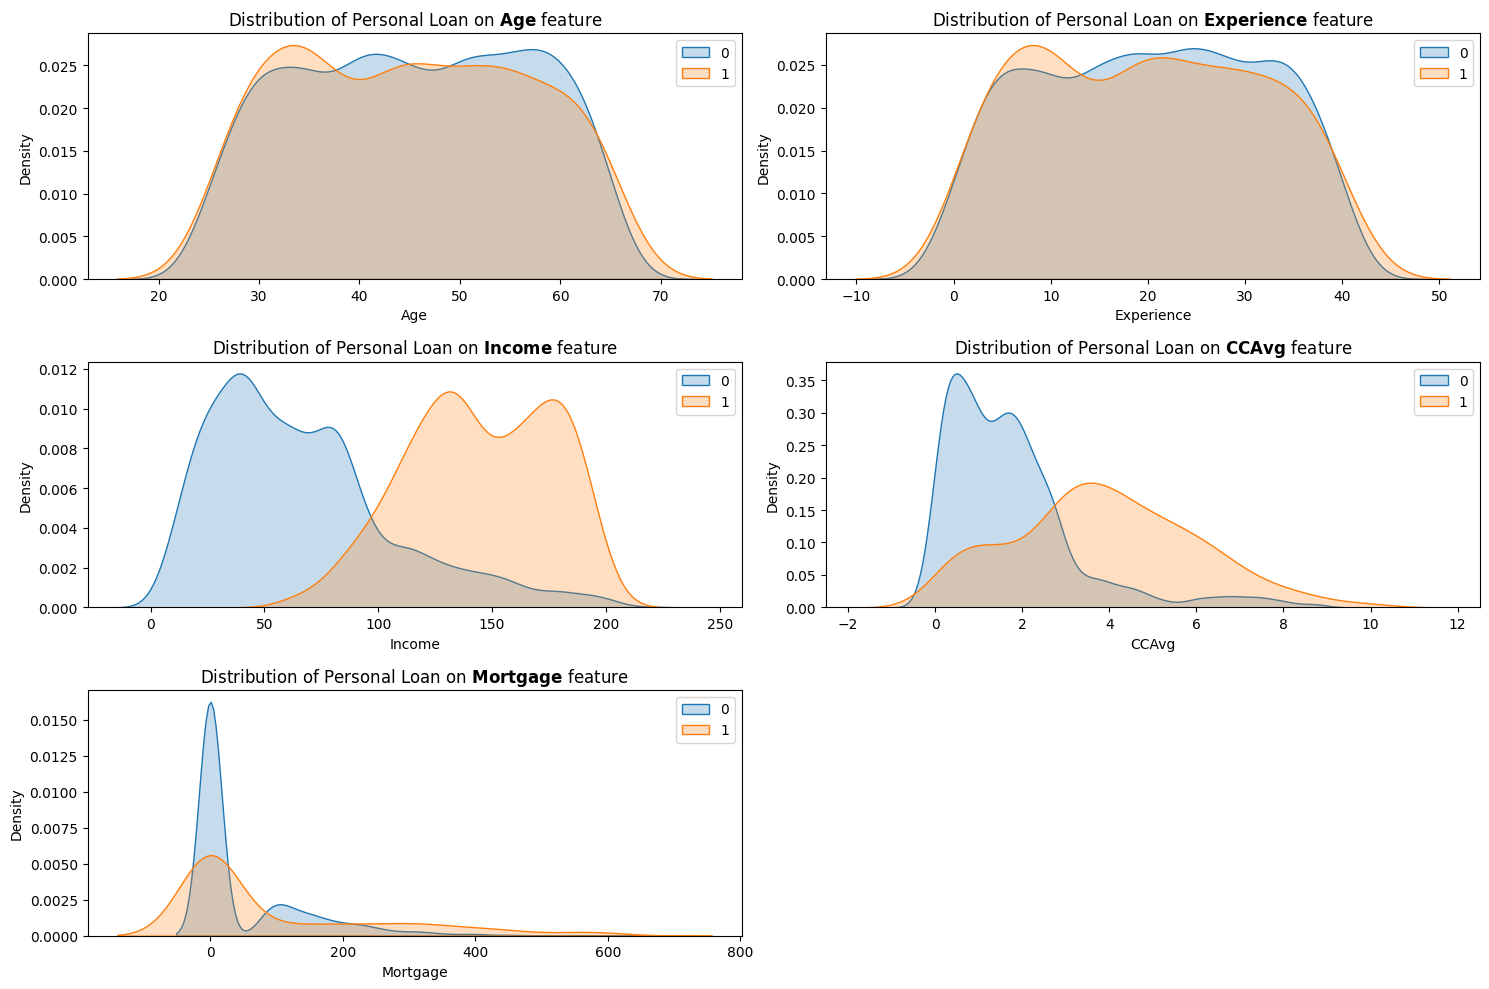

In [15]:
plt.figure(figsize = (15,10))
for i,col in enumerate(bank_continuous.columns):
    plt.subplot(3,2,i+1)
    for j in list(bank_loans['Personal Loan'].unique()) :
        sns.kdeplot(bank_loans[bank_loans['Personal Loan']==j][col], fill = True, label = j)
        plt.legend()
    plt.title(f"Distribution of Personal Loan on $\\mathbf{{{col}}}$ feature")
plt.tight_layout()
plt.show()

- The age and the years of work experience that a customer has does not have a significant bearing on whether a bank loan is approved or not. The other features then have more bearing in this matter.
- Having more income leads to a higher chance of loan approval as the bank deems you capable of repaying the loan.
- Loans are more likely to be granted if the customer uses their credit card frequently. This insight is probably related to the idea of credit score, which tells how reputable a customer is in paying back what was borrowed.
- Most customers don't have any mortgage. But, the seemingly similar distribution of the two features suggests that mortgage does not have much bearing in the approval of a loan or not.

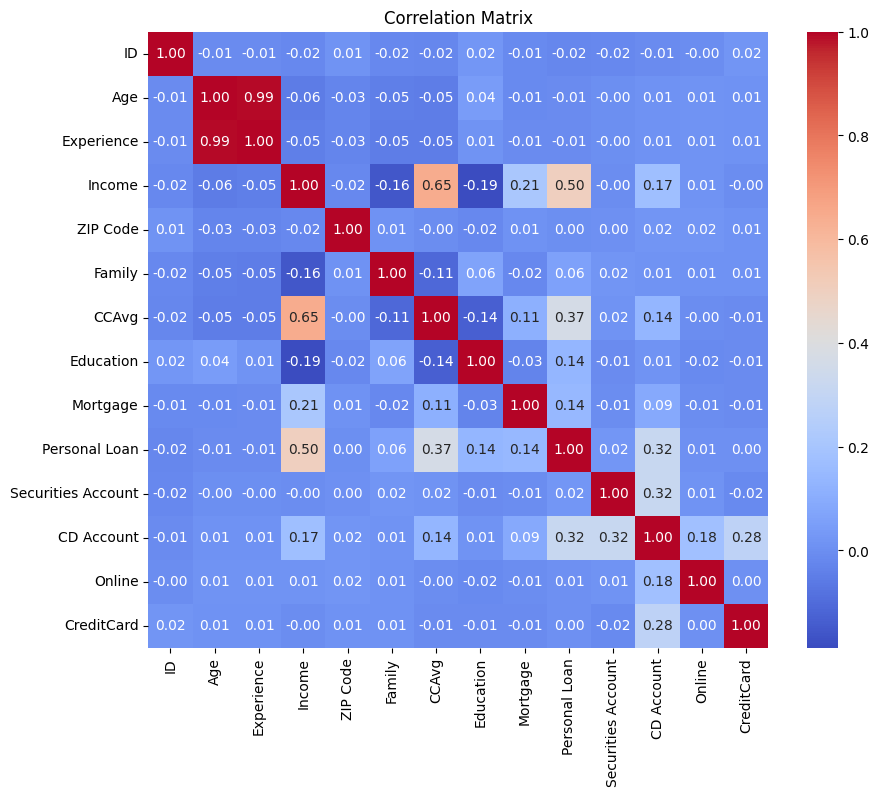

In [16]:
correlation_matrix = bank_loans.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Pre-Processing for Training

In [17]:
# Load the Dataset
bank_loans = pd.DataFrame(pd.read_csv("/content/Bank_Loan_Granting.csv"))

bank_loans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [18]:
# Remaining relevant features
bank_features = bank_loans.drop(columns = ['ID', 'ZIP Code', 'Personal Loan'])

# Convert the object type (string) to a numerical one for the models to work
bank_features['CCAvg'] = bank_features['CCAvg'].str.replace("/" , '.').astype(np.float64)

# Convert yearly income to be monthly income since CCAvg is monthly
bank_features['Income'] = bank_features['Income']/12

# Convert to absolute values for Experience
bank_features['Experience'] = abs(bank_features['Experience'])

# Target feature
bank_target = bank_loans['Personal Loan']

# Check how many of each label are there
bank_target.value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [19]:
# Apply the Undersampling or Oversampling Algorithms
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from collections import Counter

def apply_undersampling_oversampling(X_train, y_train, technique):
  # Imbalanced dataset stored in bank_features (X_train) and bank_target (y_train)

  # Count the class distribution before resampling
  print("Class distribution before resampling:", Counter(y_train))

  # Apply SMOTE
  if technique == "SMOTE":
    smote = SMOTE(random_state=42)
    bank_features_updated, bank_target_updated = smote.fit_resample(X_train, y_train)

  # Apply NearMiss
  elif technique == "NearMiss":
    near_miss = NearMiss(version=1)
    bank_features_updated, bank_target_updated = near_miss.fit_resample(X_train, y_train)

  # Apply SMOTEENN
  elif technique == "SMOTE-ENN":
    smote_enn = SMOTEENN(random_state=42)
    bank_features_updated, bank_target_updated = smote_enn.fit_resample(X_train, y_train)

  # No techniques used
  elif technique == "Original":
    bank_features_updated, bank_target_updated = X_train, y_train

  # Count the class distribution after resampling
  print("Class distribution after resampling:", Counter(bank_target_updated))

  # Plot the class distribution before and after resampling
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.bar(Counter(bank_target).keys(), Counter(bank_target).values(), color=['red', 'green'])
  plt.title('Class Distribution Before Resampling')
  plt.xlabel('Class')
  plt.ylabel('Number of Instances')
  plt.xticks([0, 1])

  plt.subplot(1, 2, 2)
  plt.bar(Counter(bank_target_updated).keys(), Counter(bank_target_updated).values(), color=['red', 'green'])
  plt.title(f'Class Distribution After Resampling ({technique})')
  plt.xlabel('Class')
  plt.ylabel('Number of Instances')
  plt.xticks([0, 1])

  plt.tight_layout()
  plt.show()

  return bank_features_updated, bank_target_updated

In [20]:
from sklearn import preprocessing

def Normalization(df,lst,rng) :
    ''' inputs
    df : the data frame that should be normal
    lst : list of columns of df that should be normal
    rng : the range of normalization

        output
    df : normalized df_in  '''

    scaler = preprocessing.MinMaxScaler(feature_range = rng)
    df[lst] = scaler.fit_transform(df[lst])
    return df

list_of_techniques = ['SMOTE-ENN']

for_normalization = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education']

Normalization(bank_features, for_normalization, (0, 1))

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.023256,0.189815,1.000000,0.16,0.0,0.000000,1,0,0,0
1,0.500000,0.441860,0.120370,0.666667,0.15,0.0,0.000000,1,0,0,0
2,0.363636,0.348837,0.013889,0.000000,0.10,0.0,0.000000,0,0,0,0
3,0.272727,0.209302,0.425926,0.000000,0.27,0.5,0.000000,0,0,0,0
4,0.272727,0.186047,0.171296,1.000000,0.10,0.5,0.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.069767,0.148148,0.000000,0.19,1.0,0.000000,0,0,1,0
4996,0.159091,0.093023,0.032407,1.000000,0.04,0.0,0.133858,0,0,1,0
4997,0.909091,0.906977,0.074074,0.333333,0.03,1.0,0.000000,0,0,0,0
4998,0.954545,0.930233,0.189815,0.666667,0.05,0.5,0.000000,0,0,1,0


### Logistic Regression (Training and Testing)

Class distribution before resampling: Counter({0: 3164, 1: 336})
Class distribution after resampling: Counter({1: 3123, 0: 3012})


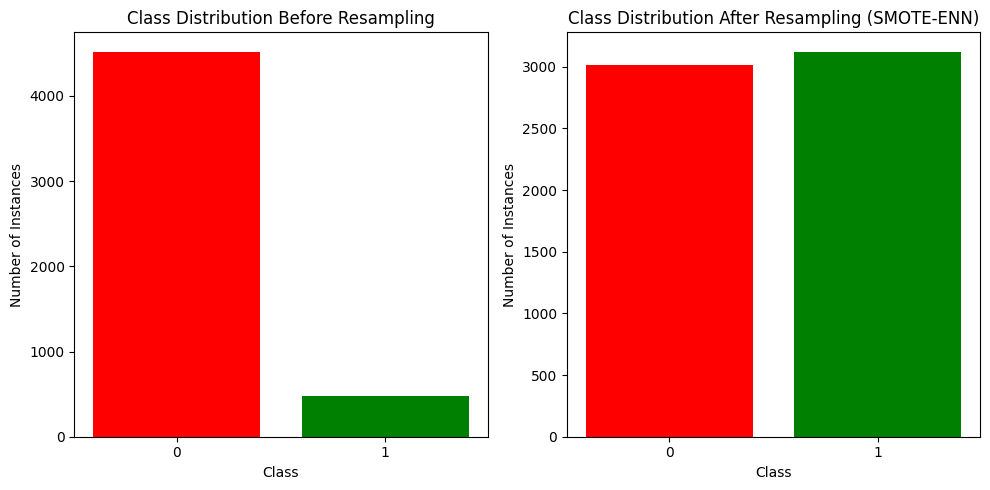

Cross-Validation Scores (Training Set) (SMOTE-ENN): [0.91693811 0.9267101  0.9267101  0.92508143 0.92345277 0.92985318
 0.91353997 0.93311582 0.91190865 0.94453507]
Mean Accuracy (Training Set) (SMOTE-ENN): 0.9252
Accuracy on Test Set: 0.8953
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1356
           1       0.47      0.84      0.61       144

    accuracy                           0.90      1500
   macro avg       0.73      0.87      0.77      1500
weighted avg       0.93      0.90      0.91      1500





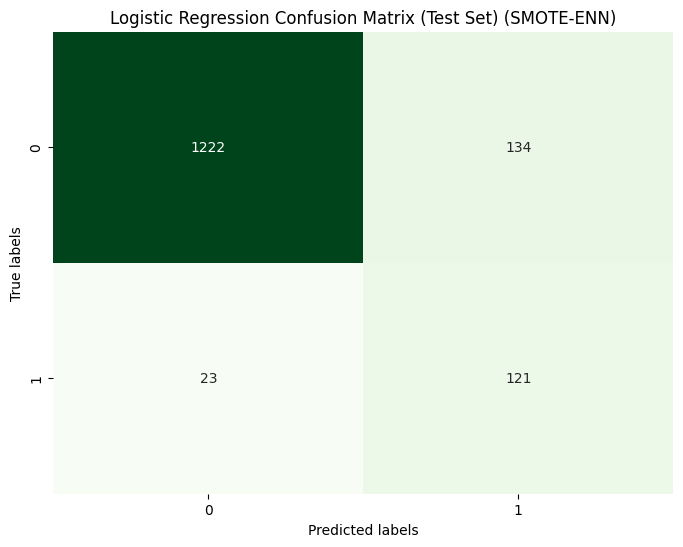

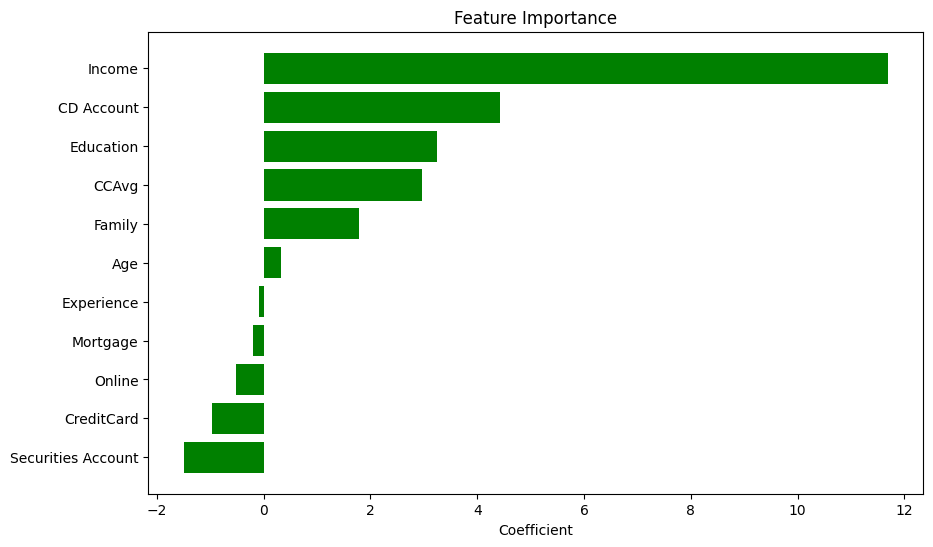

In [24]:
# Logistic Regression Training and Testing (using all features)
for i in range(len(list_of_techniques)):

  # Setting up
  X_train, X_test, y_train, y_test = train_test_split(bank_features, bank_target, test_size=0.3, random_state=22, stratify = bank_target)

  # Apply the undersampling or oversampling techniques
  X_train, y_train = apply_undersampling_oversampling(X_train, y_train, list_of_techniques[i])

  # Instantiate the logistic regression model
  logistic_regression_model = LogisticRegression()

  # Fit the model (Training Part)
  logistic_regression_model.fit(X_train, y_train)

  # Perform cross-validation (to see if the model is generalizable and not overfitting)
  cv_scores_training = cross_val_score(logistic_regression_model, X_train, y_train, cv=StratifiedKFold(10))

  # Print the cross-validation scores
  print(f'Cross-Validation Scores (Training Set) ({list_of_techniques[i]}): {cv_scores_training}')

  # Calculate the mean accuracy
  mean_accuracy_training = np.mean(cv_scores_training)
  print(f'Mean Accuracy (Training Set) ({list_of_techniques[i]}): {mean_accuracy_training:.4f}')

  # Test the model on the test set (Testing Part)
  y_pred_test = logistic_regression_model.predict(X_test)

  # Calculate accuracy on the test set
  accuracy_test = accuracy_score(y_test, y_pred_test)
  print(f'Accuracy on Test Set: {accuracy_test:.4f}')

  # Generate classification report for the test set
  report_test = classification_report(y_test, y_pred_test)
  print('Classification Report on Test Set:\n', report_test)

  print("\n")

  # Create the confusion matrix for the test set
  cm_lr_test = confusion_matrix(y_test, y_pred_test)

  # Plotting the confusion matrix for the test set
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_lr_test, annot=True, fmt='d', cmap='Greens', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title(f'Logistic Regression Confusion Matrix (Test Set) ({list_of_techniques[i]})')
  plt.show()

  print("\n")

  # Feature Importance
  coefficients = logistic_regression_model.coef_[0]
  feature_names = bank_features.columns

  feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

  # Sort the feature importance DataFrame in descending order
  feature_importance_sorted = feature_importance.sort_values(by='Coefficient', ascending=False)

  # Plotting the feature importance
  plt.figure(figsize=(10, 6))
  plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Coefficient'], color='green')
  plt.xlabel('Coefficient')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert y-axis to have the highest coefficient at the top
  plt.show()

### Decision Tree (Training and Testing)

Class distribution before resampling: Counter({0: 3164, 1: 336})
Class distribution after resampling: Counter({1: 3123, 0: 3012})


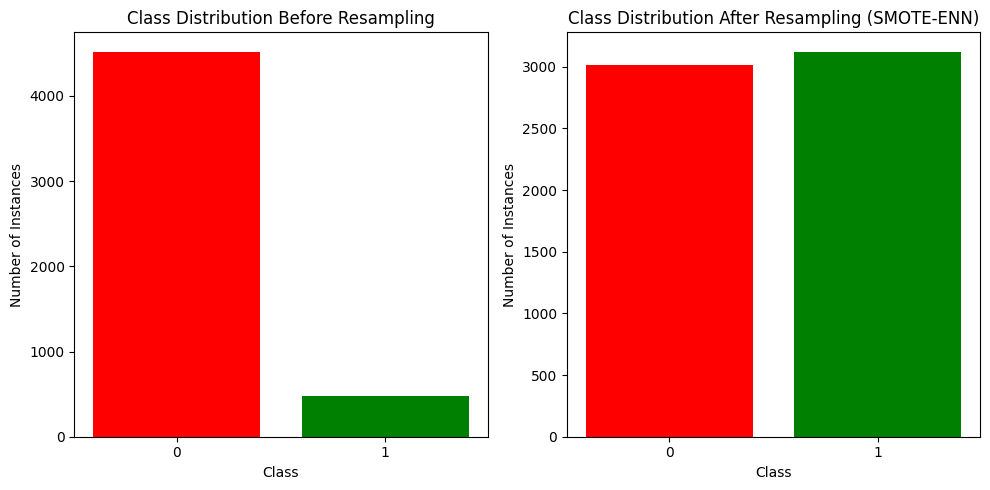

Cross-validation scores: [0.97882736 0.99511401 0.99837134 0.99185668 0.99511401 0.99673736
 0.99347471 0.99510604 0.99673736 0.99021207]
Mean cross-validation score: 0.9931550924326882
Accuracy on Test Set (Decision Tree) (SMOTE-ENN): 0.9813
Classification Report on Test Set (Decision Tree):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.92      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500





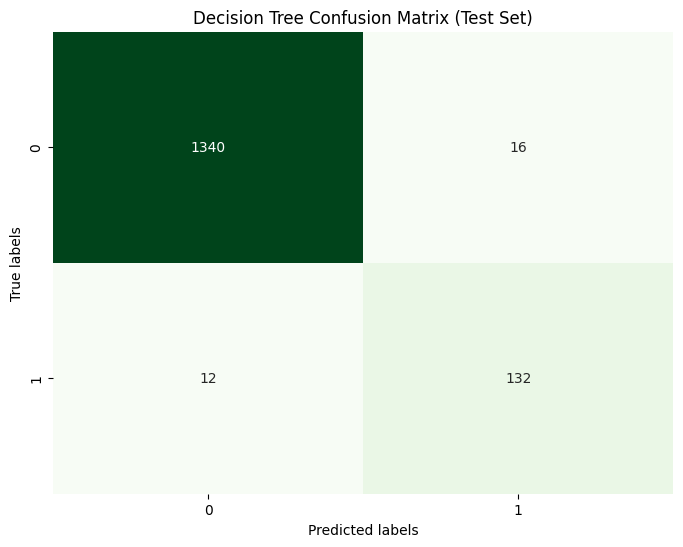

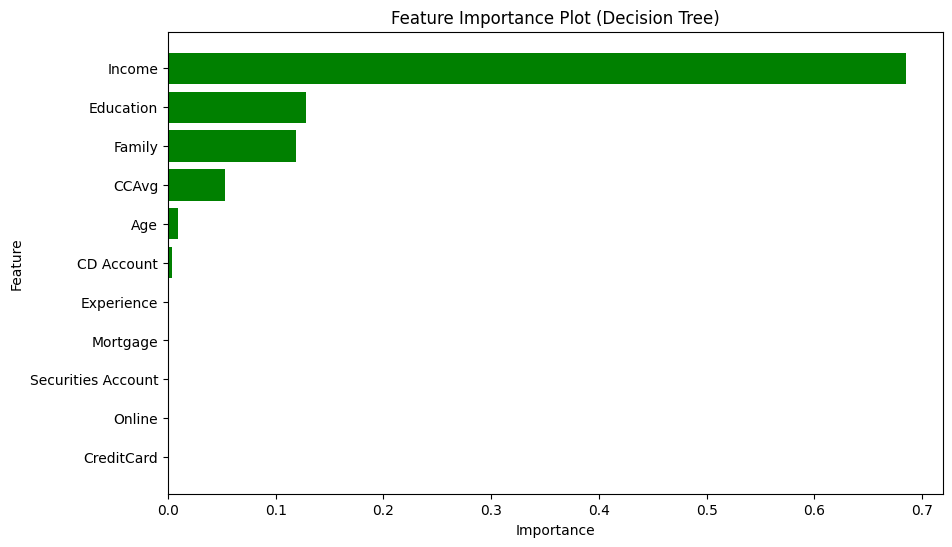

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Decision Tree Training and Testing (using all features)
for i in range(len(list_of_techniques)):

    # Setting up
    X_train, X_test, y_train, y_test = train_test_split(bank_features, bank_target, test_size=0.3, random_state=22, stratify = bank_target)

    # Apply the undersampling or oversampling techniques
    X_train, y_train = apply_undersampling_oversampling(X_train, y_train, list_of_techniques[i])

    # Instantiate the decision tree model
    decision_tree_model = DecisionTreeClassifier(random_state=22)

    # Fit the model (Training Part)
    decision_tree_model.fit(X_train, y_train)

    # Perform k-fold cross-validation (let's say k=10 for this example)
    cross_val_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=StratifiedKFold(10))

    # Print the cross-validation scores
    print("Cross-validation scores:", cross_val_scores)
    print("Mean cross-validation score:", np.mean(cross_val_scores))

    # Test the model on the test set (Testing Part)
    y_pred_test_dt = decision_tree_model.predict(X_test)

    # Calculate accuracy on the test set for the decision tree
    accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)
    print(f'Accuracy on Test Set (Decision Tree) ({list_of_techniques[i]}): {accuracy_test_dt:.4f}')

    # Generate classification report for the test set (Decision Tree)
    report_test_dt = classification_report(y_test, y_pred_test_dt)
    print('Classification Report on Test Set (Decision Tree):\n', report_test_dt)

    print("\n")

    # Create the confusion matrix for the test set (Decision Tree)
    cm_dt_test = confusion_matrix(y_test, y_pred_test_dt)

    # Plotting the confusion matrix for the test set (Decision Tree)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Decision Tree Confusion Matrix (Test Set)')
    plt.show()

    print("\n")

    # Feature Importance (for decision trees)
    feature_importance_dt = decision_tree_model.feature_importances_
    feature_names_dt = bank_features.columns

    feature_importance_df_dt = pd.DataFrame({'Feature': feature_names_dt, 'Importance': feature_importance_dt})
    feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

    # Reverse the DataFrame to plot in ascending order of importance
    feature_importance_df_dt = feature_importance_df_dt[::-1]

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df_dt['Feature'], feature_importance_df_dt['Importance'], color='green')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot (Decision Tree)')
    plt.show()

    print("\n")

    # Export the decision tree to a .dot file
    dot_data = tree.export_graphviz(decision_tree_model, out_file=None,
                                    feature_names= bank_features.columns,
                                    class_names=np.unique(bank_target).astype(str),
                                    filled=True, rounded=True,
                                    special_characters=True)

    # Render the .dot file as an image using Graphviz
    graph = graphviz.Source(dot_data)
    graph.render(f"Decision Tree Model ({list_of_techniques[i]})", format='png', cleanup=True)

    # Display the decision tree
    graph.view()


### Random Forest (Training and Testing)

Class distribution before resampling: Counter({0: 3164, 1: 336})
Class distribution after resampling: Counter({1: 3123, 0: 3012})


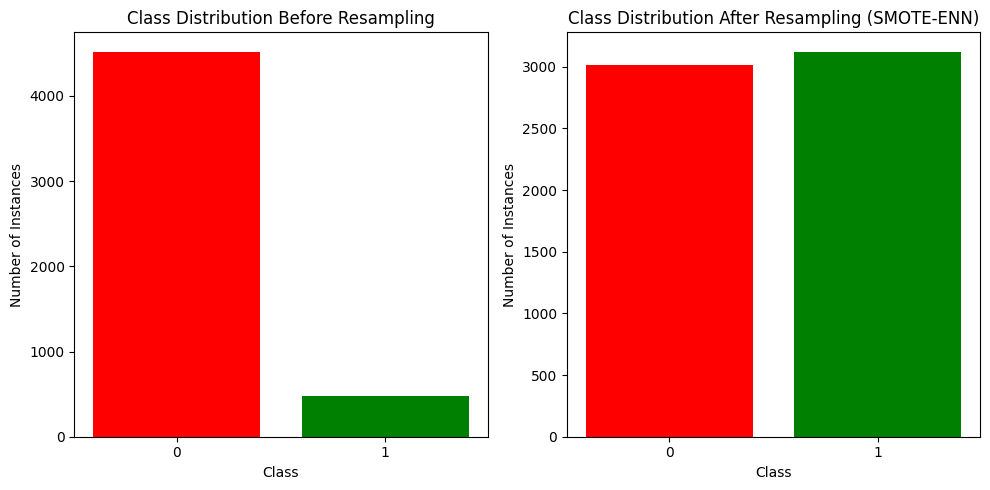

Cross-validation scores: [0.99022801 0.99511401 1.         0.99837134 0.99511401 0.99673736
 0.99836868 1.         0.99673736 0.99510604]
Mean cross-validation score: 0.9965776790601037
Accuracy on Test Set (SMOTE-ENN): 0.9820
Classification Report on Test Set (SMOTE-ENN):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.92      0.91       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500





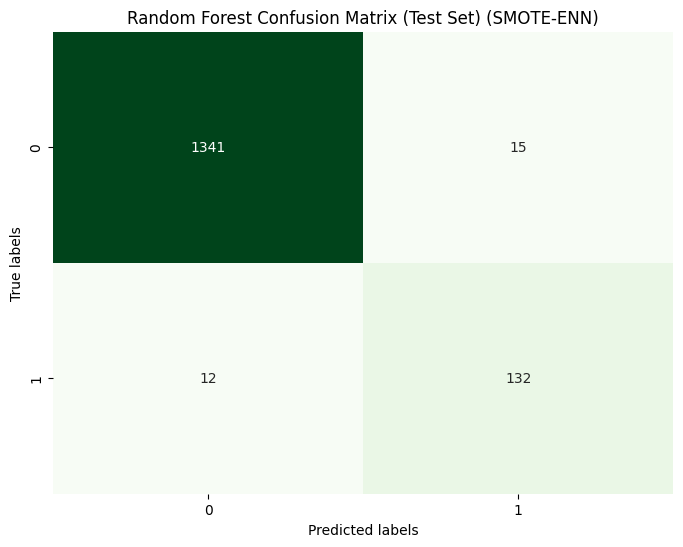

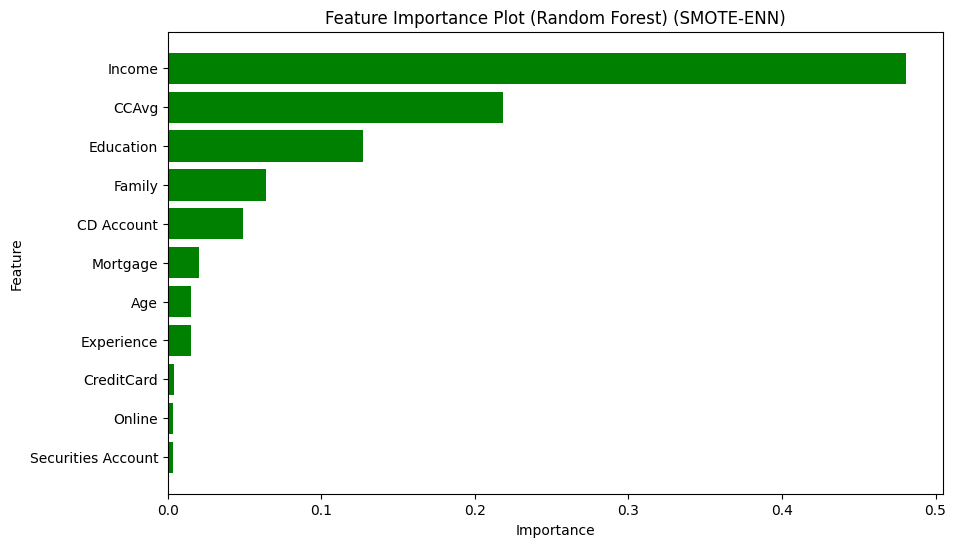

               Feature  Importance
7   Securities Account    0.003068
9               Online    0.003491
10          CreditCard    0.003995
1           Experience    0.014851
0                  Age    0.015196
6             Mortgage    0.020475
8           CD Account    0.049029
3               Family    0.064077
5            Education    0.126859
4                CCAvg    0.218194
2               Income    0.480763




In [28]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Training and Testing (using all features)
for i in range(len(list_of_techniques)):

  # Setting up
  X_train, X_test, y_train, y_test = train_test_split(bank_features, bank_target, test_size=0.3, random_state=22, stratify = bank_target)

  # Apply the undersampling or oversampling techniques
  X_train, y_train = apply_undersampling_oversampling(X_train, y_train, list_of_techniques[i])

  # Instantiate the Random Forest model
  random_forest_model = RandomForestClassifier(random_state=22)

  # Fit the Random Forest model (Training Part)
  random_forest_model.fit(X_train, y_train)

  # Since Random Forest doesn't need cross-validation during training (it internally does bootstrapping and averaging), skip the cross-validation step
  # Perform k-fold cross-validation (let's say k=10 for this example)
  cross_val_scores = cross_val_score(random_forest_model, X_train, y_train, cv=StratifiedKFold(10))

  # Print the cross-validation scores
  print("Cross-validation scores:", cross_val_scores)
  print("Mean cross-validation score:", np.mean(cross_val_scores))

  # Test the model on the test set (Testing Part)
  y_pred_test_rf = random_forest_model.predict(X_test)

  # Calculate accuracy on the test set for Random Forest
  accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
  print(f'Accuracy on Test Set ({list_of_techniques[i]}): {accuracy_test_rf:.4f}')

  # Generate classification report for the test set with Random Forest
  report_test_rf = classification_report(y_test, y_pred_test_rf)
  print(f'Classification Report on Test Set ({list_of_techniques[i]}):\n', report_test_rf)

  print("\n")

  # Create the confusion matrix for the test set with Random Forest
  cm_rf_test = confusion_matrix(y_test, y_pred_test_rf)

  # Plotting the confusion matrix for the test set with Random Forest
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Greens', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title(f'Random Forest Confusion Matrix (Test Set) ({list_of_techniques[i]})')
  plt.show()

  print("\n")

  # Feature Importance for Random Forest
  feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': random_forest_model.feature_importances_})
  feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

  # Reverse the DataFrame to plot in descending order of importance
  feature_importance_rf = feature_importance_rf[::-1]

  plt.figure(figsize=(10, 6))
  plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='green')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.title(f'Feature Importance Plot (Random Forest) ({list_of_techniques[i]})')
  plt.show()

  print(feature_importance_rf)
  print("\n")

### Grid Search

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Class distribution before resampling: Counter({0: 3164, 1: 336})
Class distribution after resampling: Counter({1: 3123, 0: 3012})


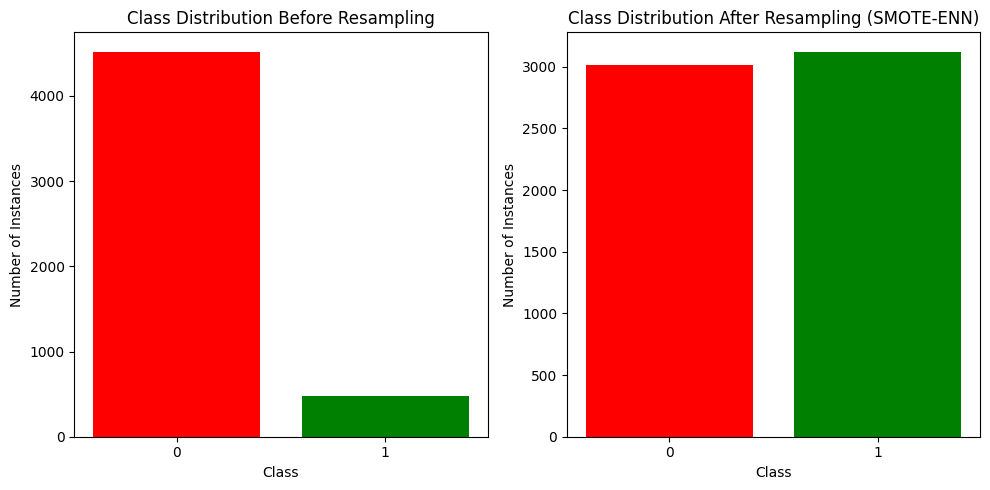

Best Features Indices: [ 0  1  2  3  4  5  6  7  8  9 10]
X_train shape: (6135, 11)
X_test shape: (1500, 11)
Best Features: [ True  True  True  True  True  True  True  True  True  True  True]
Best Parameters: {'feature_selection__n_features_to_select': 11, 'logistic_regression__C': 0.1, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
Best Accuracy: 0.925999649292474


In [22]:
# Grid Search

results = []  # Store results in a list

for i in range(len(list_of_techniques)):

    X_train, X_test, y_train, y_test = train_test_split(bank_features, bank_target, test_size=0.3, random_state=22, stratify = bank_target)

    X_train, y_train = apply_undersampling_oversampling(X_train, y_train, list_of_techniques[i])

    # Parameter Grid
    param_grid = {
        'feature_selection__n_features_to_select': [3, 5, 11],  # Number of features to select
        'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
        'logistic_regression__penalty': ['l1', 'l2'],  # Penalty type
        'logistic_regression__solver': ['liblinear']  # Solver for logistic regression
    }

    # Create a pipeline
    pipe = Pipeline([
        ('feature_selection', RFE(LogisticRegression())),
        ('logistic_regression', LogisticRegression())
    ])

    # Grid Search Implementation
    grid_search = GridSearchCV(pipe, param_grid, cv=StratifiedKFold(10))
    grid_search.fit(X_train, y_train)

    # After fitting the grid search
    best_features_indices = grid_search.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
    print("Best Features Indices:", best_features_indices)

    # Verify the shape of X_train and X_test
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)

    # Ensure that best_features has the correct number of indices
    if len(best_features_indices) != X_train.shape[1]:
        print("Error: Number of features selected doesn't match the data shape.")

    # Get the best features, parameters, and accuracy
    best_features = grid_search.best_estimator_.named_steps['feature_selection'].get_support(indices=False)
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    print("Best Features:", best_features)
    print("Best Parameters:", best_params)
    print("Best Accuracy:", best_accuracy)

    # Store results
    results.append({
        'features': best_features,
        'params': best_params,
        'accuracy': best_accuracy
    })

In [23]:
bank_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   float64
 1   Experience          5000 non-null   float64
 2   Income              5000 non-null   float64
 3   Family              5000 non-null   float64
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   float64
 6   Mortgage            5000 non-null   float64
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 429.8 KB


### SVM (Training and Testing)

Class distribution before resampling: Counter({0: 3164, 1: 336})
Class distribution after resampling: Counter({1: 3123, 0: 3012})


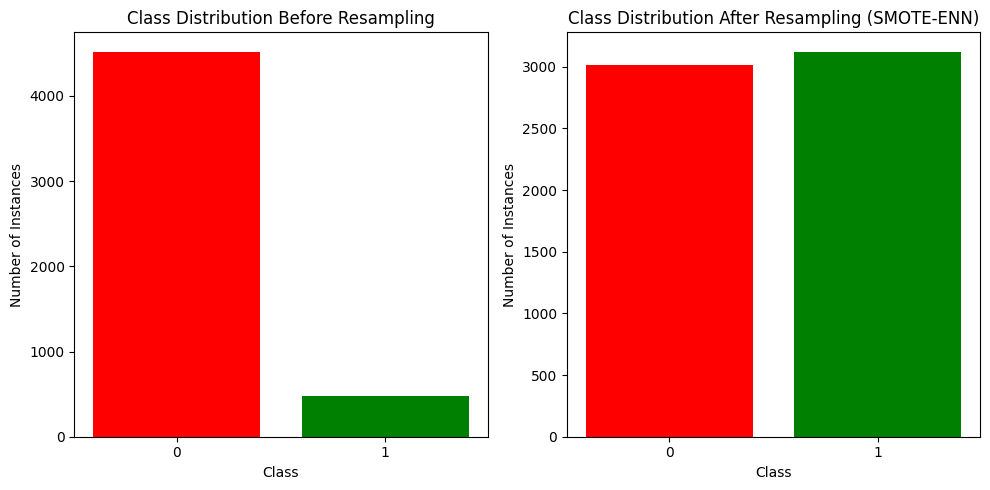

Cross-Validation Scores (Training Set) (SMOTE-ENN): [0.98208469 0.98371336 0.98697068 0.98859935 0.98371336 0.98531811
 0.99347471 0.98858075 0.99184339 0.98205546]
Mean Accuracy (Training Set) (SMOTE-ENN): 0.9866
Accuracy on Test Set (SMOTE-ENN): 0.9600
Classification Report on Test Set ({list_of_techniques[i]}):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1356
           1       0.74      0.90      0.81       144

    accuracy                           0.96      1500
   macro avg       0.87      0.93      0.89      1500
weighted avg       0.96      0.96      0.96      1500



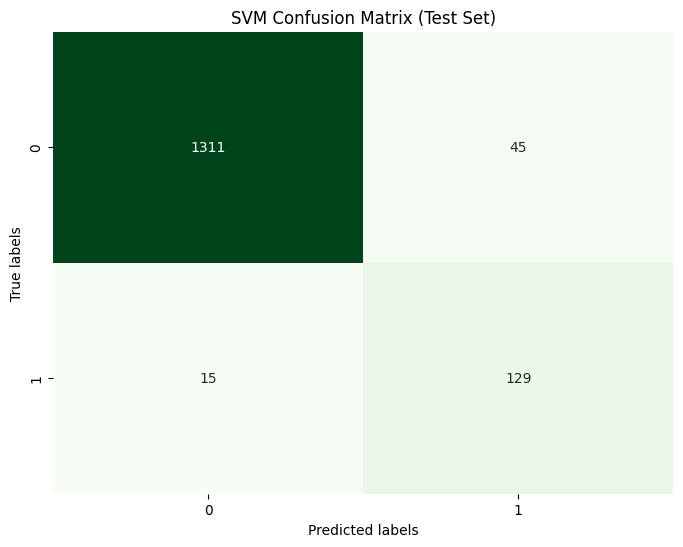

In [27]:
from sklearn.svm import SVC

# SVM Training and Testing (using all features)
for i in range(len(list_of_techniques)):

    # Setting up
    X_train, X_test, y_train, y_test = train_test_split(bank_features, bank_target, test_size=0.3, random_state=22, stratify=bank_target)

    # Apply the undersampling or oversampling techniques
    X_train, y_train = apply_undersampling_oversampling(X_train, y_train, list_of_techniques[i])

    # Instantiate the SVM model
    svm_model = SVC(random_state=22)

    # Fit the model (Training Part)
    svm_model.fit(X_train, y_train)

    # Perform cross-validation (to see if the model is generalizable and not overfitting)
    cv_scores_training = cross_val_score(svm_model, X_train, y_train, cv=StratifiedKFold(10))

    # Print the cross-validation scores
    print(f'Cross-Validation Scores (Training Set) ({list_of_techniques[i]}): {cv_scores_training}')

    # Calculate the mean accuracy
    mean_accuracy_training = np.mean(cv_scores_training)
    print(f'Mean Accuracy (Training Set) ({list_of_techniques[i]}): {mean_accuracy_training:.4f}')

    # Test the model on the test set (Testing Part)
    y_pred_test = svm_model.predict(X_test)

    # Calculate accuracy on the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f'Accuracy on Test Set ({list_of_techniques[i]}): {accuracy_test:.4f}')

    # Generate classification report for the test set
    report_test = classification_report(y_test, y_pred_test)
    print('Classification Report on Test Set ({list_of_techniques[i]}):\n', report_test)

    # Create the confusion matrix for the test set
    cm_svm_test = confusion_matrix(y_test, y_pred_test)

    # Plotting the confusion matrix for the test set
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_svm_test, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('SVM Confusion Matrix (Test Set)')
    plt.show()

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/